In [85]:
import numpy as np

In [86]:
n = 3
N = n*n

R = np.random.random((n,2))
B = np.random.random((n,2))

D = np.empty((n,n))

for i in range(n):
    for j in range(n):
        D[i][j] = ( (R[i][0]-B[j][0])**2 + (R[i][1]-B[j][1])**2 )**(0.5)

print(D)
Q = {}
S = {}


[[0.99585537 0.51352944 0.62293946]
 [0.68446113 0.45386641 0.52725489]
 [0.89998642 0.98371305 1.04685368]]


In [87]:
lamba = 2
alpha = 2
print('Lamba: ' + str(lamba))
print('Alpha: ' + str(alpha))
for i in range(N):
    Q[(i,i)] = D[int(i/n)][i%n]-alpha*lamba

print('Q diagonal done.')

Lamba: 2
Alpha: 2
Q diagonal done.


In [88]:
beta = 2

print('Beta: ' + str(beta))

for i in range(N):
    for j in range(i+1,N):
        if int(i/n)==int(j/n) or i%n==j%n:
            S[(i,j)] = 1
            Q[(i,j)] = beta*lamba

Beta: 2


In [89]:
from dimod.utilities import qubo_to_ising
from dimod import BinaryQuadraticModel

(h, J, ising_offset) = qubo_to_ising(Q)
bqm = BinaryQuadraticModel.from_qubo(Q)

In [90]:
print(ising_offset)
print(h)
print(J)

3.364229925928946
{0: 2.497927684187638, 1: 2.2567647210009176, 2: 2.3114697316331885, 3: 2.3422305671520967, 4: 2.2269332032282625, 5: 2.2636274474466083, 6: 2.4499932095780506, 7: 2.491856523849237, 8: 2.5234268378529463}
{(1, 2): 1.0, (0, 1): 1.0, (4, 7): 1.0, (6, 7): 1.0, (6, 8): 1.0, (4, 5): 1.0, (2, 8): 1.0, (1, 4): 1.0, (0, 2): 1.0, (0, 6): 1.0, (3, 6): 1.0, (1, 7): 1.0, (3, 4): 1.0, (2, 5): 1.0, (7, 8): 1.0, (0, 3): 1.0, (5, 8): 1.0, (3, 5): 1.0}


In [91]:
from dwave.system.samplers import DWaveSampler
from minorminer import find_embedding

sampler = DWaveSampler(config_file='/home/manoj/.config/dwave/dwave.conf',profile='old')
A = sampler.edgelist
AD = sampler.adjacency
print(AD)

{0: set([128, 4, 5, 6, 7]), 1: set([129, 4, 5, 6, 7]), 2: set([130, 4, 5, 6, 7]), 3: set([131, 4, 5, 6, 7]), 4: set([0, 1, 2, 3, 12]), 5: set([0, 1, 2, 3, 13]), 6: set([0, 1, 2, 3, 14]), 7: set([0, 1, 2, 3, 15]), 8: set([136, 12, 13, 14, 15]), 9: set([137, 12, 13, 14, 15]), 10: set([138, 12, 13, 14, 15]), 11: set([139, 12, 13, 14, 15]), 12: set([4, 8, 9, 10, 11, 20]), 13: set([5, 8, 9, 10, 11, 21]), 14: set([6, 8, 9, 10, 11, 22]), 15: set([7, 8, 9, 10, 11, 23]), 16: set([144, 20, 21, 22, 23]), 17: set([145, 20, 21, 22, 23]), 18: set([146, 20, 21, 22, 23]), 19: set([147, 20, 21, 22, 23]), 20: set([12, 16, 17, 18, 19, 28]), 21: set([13, 16, 17, 18, 19, 29]), 22: set([14, 16, 17, 18, 19, 30]), 23: set([15, 16, 17, 18, 19, 31]), 24: set([152, 28, 29, 30, 31]), 25: set([153, 28, 29, 30, 31]), 26: set([154, 28, 29, 30, 31]), 27: set([155, 28, 29, 30, 31]), 28: set([36, 20, 24, 25, 26, 27]), 29: set([37, 21, 24, 25, 26, 27]), 30: set([38, 22, 24, 25, 26, 27]), 31: set([39, 23, 24, 25, 26, 27]

In [92]:
embeddings = find_embedding(S, A, verbose=1)

print(embeddings)

initialized
embedding found.
max chain length 4; num max chains=1
reducing chain lengths
max chain length 3; num max chains=3
{0: [1173, 1181], 1: [1168, 1040], 2: [1175, 1183, 1179], 3: [1178, 1182], 4: [1050, 1053, 1045], 5: [1177, 1049], 6: [1048, 1176], 7: [1047, 1055], 8: [1051, 1052]}


In [93]:
from dimod import embed_ising

h0, j0 = embed_ising(h, J, embeddings, AD)

j_emb = j0.copy()

In [94]:
#from dwave.system.composites import FixedEmbeddingComposite
print format(sampler.parameters)
num_reads = 1000
annealing_time= 200
programming_thermalization=sampler.properties['default_programming_thermalization']
result = sampler.sample_ising(h0, j_emb, num_reads=num_reads,annealing_time=annealing_time, 
                              programming_thermalization=programming_thermalization, answer_mode='histogram')
print 'result {}'.format(result)


{u'reduce_intersample_correlation': ['parameters'], u'num_spin_reversal_transforms': ['parameters'], u'programming_thermalization': ['parameters'], u'reinitialize_state': ['parameters'], u'anneal_offsets': ['parameters'], u'num_reads': ['parameters'], u'max_answers': ['parameters'], u'readout_thermalization': ['parameters'], u'flux_biases': ['parameters'], u'beta': ['parameters'], u'answer_mode': ['parameters'], u'auto_scale': ['parameters'], u'postprocess': ['parameters'], u'annealing_time': ['parameters'], u'anneal_schedule': ['parameters'], u'initial_state': ['parameters'], u'chains': ['parameters'], u'flux_drift_compensation': ['parameters']}
result Response(rec.array([([ 1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1], -25.39785721, 900),
           ([ 1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1], -24.93883703,  14),
           ([ 1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1], -24.882

In [95]:
total_real_time = result.info['timing']['total_real_time']

timing = np.asarray(result.info['timing'].items())

In [96]:
from dimod import unembed_response

resp = unembed_response(result, embeddings, bqm)

print 'Solution string {}'.format(resp)

Solution string Response(rec.array([([-1,  1, -1, -1, -1,  1,  1, -1, -1], -14.84691834, 900),
           ([-1,  1, -1, -1, -1,  1,  1, -1, -1], -14.84691834,  14),
           ([-1,  1, -1, -1, -1,  1,  1, -1, -1], -14.84691834,   4),
           ([-1, -1,  1, -1,  1, -1,  1, -1, -1], -14.77487527,  13),
           ([ 1,  1, -1, -1, -1,  1, -1,  1, -1], -20.68775435,  26),
           ([-1, -1,  1,  1, -1, -1, -1,  1, -1], -14.14623256,  12),
           ([ 1, -1, -1, -1,  1, -1, -1, -1,  1], -13.73530895,   9),
           ([ 1, -1, -1, -1, -1,  1, -1,  1, -1], -13.71481323,   5),
           ([ 1, -1, -1, -1,  1,  1, -1, -1,  1], -20.68079916,   2),
           ([-1,  1,  1,  1, -1, -1, -1,  1, -1], -21.11917368,   2),
           ([ 1,  1, -1, -1, -1,  1, -1, -1, -1],   1.34481956,   1),
           ([ 1,  1, -1, -1,  1, -1, -1, -1,  1], -20.70825007,   2),
           ([-1,  1,  1, -1,  1, -1,  1, -1, -1], -21.74781639,  10)],
          dtype=[('sample', 'i1', (9,)), ('energy', '<f8'), ('nu

In [97]:
resp.samples_matrix[resp.samples_matrix < 0]=0

print(resp.samples_matrix.astype(bool))

print "\n---------\n"

configs = resp.samples_matrix.astype(bool)
configs = np.asarray([ c.reshape(-1, n) for c in configs])

energy = resp.data_vectors['energy']
freq = resp.data_vectors['num_occurrences']

idx = np.argsort(-freq)

configs = configs[idx]
energy = energy[idx]
freq = freq[idx]

configs = [np.array(a).reshape(-1, n) for a in configs]

to_del = []

for c in range(len(configs)):
    row_sum = configs[c].sum(axis=0)
    col_sum = configs[c].sum(axis=1)
    if ( not (np.array_equal(row_sum,np.ones(n, dtype = int)))):
        to_del = np.append(to_del, int(c))
    else:
        if ( not (np.array_equal(col_sum,np.ones(n, dtype = int)))):
            to_del = np.append(to_del, int(c))
    
print format(to_del)

configs = np.delete(configs, to_del, axis=0)
energy = np.delete(energy, to_del)
freq = np.delete(freq, to_del)

print(len(configs))
print(len(energy))

print(configs)
print(energy)
print(freq)

[[False  True False False False  True  True False False]
 [False  True False False False  True  True False False]
 [False  True False False False  True  True False False]
 [False False  True False  True False  True False False]
 [ True  True False False False  True False  True False]
 [False False  True  True False False False  True False]
 [ True False False False  True False False False  True]
 [ True False False False False  True False  True False]
 [ True False False False  True  True False False  True]
 [False  True  True  True False False False  True False]
 [ True  True False False False  True False False False]
 [ True  True False False  True False False False  True]
 [False  True  True False  True False  True False False]]

---------

[ 1.  5.  9. 10. 11. 12.]
7
7
[[[False  True False]
  [False False  True]
  [ True False False]]

 [[False  True False]
  [False False  True]
  [ True False False]]

 [[False False  True]
  [False  True False]
  [ True False False]]

 [[False Fal

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [98]:
cost=np.zeros(len(configs))

for c in range(len(configs)):
    for i in range(n):
        for j in range(n):
            if (configs[c])[i][j] == 1:
                cost[c] += D[i][j]

print(cost)


[1.94077076 1.94077076 1.97679229 2.29111365 2.49657545 2.50682331
 1.94077076]


[[False  True False]
 [False False  True]
 [ True False False]]
1.9407707560511527
('Found a valid min cost result at index ', 0)
('Found a valid min cost result at index ', 1)
('Found a valid min cost result at index ', 6)
('The count of min cost in valid results is ', 3)
('The frequency of min cost in valid results is ', 918)


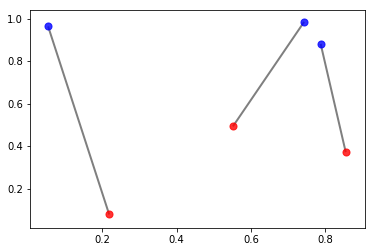

In [99]:
#Brute Force Minimum Check
import itertools as it
import math

f_n = math.factorial(n)

P=np.empty((f_n,n))
    
for i,j in enumerate(it.permutations(range(n))):
    P[i] = j

#print(P)

min_cost = 100

for item in P:
    perm_cost = 0
    for j in range(n):
        perm_cost += D[j][ int(item[j]) ]
    
    if perm_cost < min_cost:
        min_cost = perm_cost
        min_cost_config = item

min_config = np.zeros((n,n), dtype=bool)

for i in range(n):
    min_config[i][ int(min_cost_config[i]) ]=1
    
print(min_config)
print(min_cost)

min_count_cost = 0
min_frequency_count = 0

for c in range(len(configs)):
    if (cost[c] == min_cost): 
        min_count_cost += 1
        min_frequency_count += freq[c]
        print("Found a valid min cost result at index ", c)

print("The count of min cost in valid results is ", min_count_cost)
print("The frequency of min cost in valid results is ", min_frequency_count)

import networkx as nx
import matplotlib.pyplot as plt

G=nx.empty_graph()

nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8)
nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8)

E = []

for i in range(n):
    for j in range(n):
        if min_config[i][j]==1:
            E.append((i,n+j))

nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k')

plt.show()

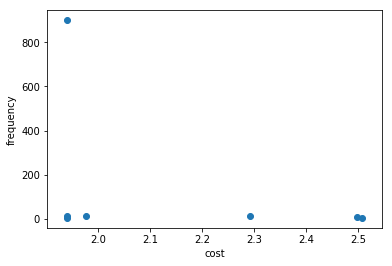

<Figure size 720x720 with 0 Axes>

In [100]:
plt.scatter(cost, freq)
plt.xlabel('cost')
plt.ylabel('frequency')

plt.figure(figsize=(10,10), facecolor='w', edgecolor='w')
plt.show()

for i in range(len(cost)):
    if cost[i]>1.474018 and cost[i]<1.47402:
        print i


Rows and Columns:  3 x 3 





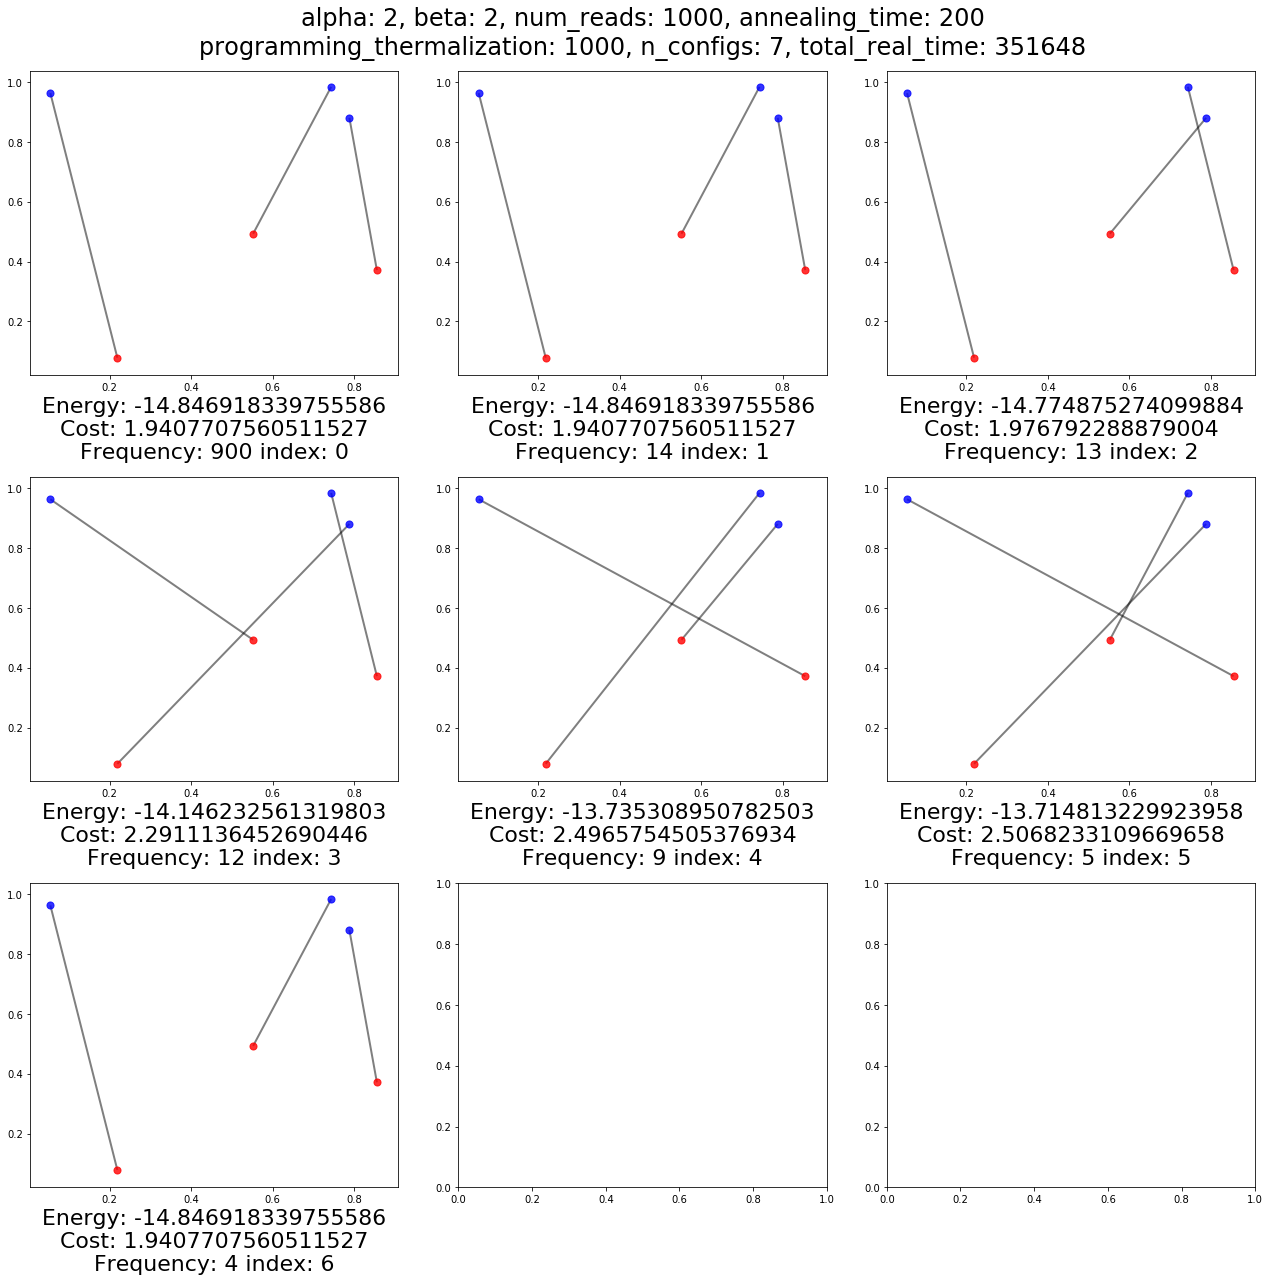

In [101]:
import networkx as nx

n_configs = len(configs)
n_cols = 3
n_rows = int(np.ceil(float(n_configs)/n_cols))

print '\nRows and Columns: ', n_rows, 'x', n_cols, '\n\n\n'
f, axarr = plt.subplots(n_rows, n_cols, figsize=(6*n_cols,6*n_rows), squeeze=False)

f.patch.set_facecolor('white')

for i in range(n_rows):
    for j in range(n_cols):
        k = i*n_cols+j
        if k<n_configs:
            axarr[i][j].set_xlabel('Energy: ' + str(energy[k]) + '\nCost: ' + str(cost[k])
                               + '\nFrequency: ' + str(freq[k]) + ' index: ' + str(k), fontsize=22 )
            
        #axarr[i][j].set_aspect(aspect=1, adjustable='box')

G=nx.empty_graph()

for c in range(n_configs):
       
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])

    E = []

    for i in range(n):
        for j in range(n):
            if configs[c][i][j]==1:
                E.append((i,n+j))

    nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k', ax=axarr[c/n_cols,c%n_cols])
    
f.tight_layout(rect=[0, 0.03, 1, 0.978])
plt.suptitle('alpha: '+str(alpha)+', beta: '+str(beta)+', num_reads: '+str(num_reads)+
             ', annealing_time: '+str(annealing_time)+
             '\nprogramming_thermalization: '+str(programming_thermalization)+
             ', n_configs: '+str(n_configs)+', total_real_time: '+str(total_real_time), verticalalignment='baseline', fontsize=24)
plt.show()

In [102]:
np.savez('outputs/'+str(n)+'_dwave_old', R=R, B=B, alpha=alpha, beta=beta, num_reads=num_reads,
         annealing_time=annealing_time, programming_thermalization=programming_thermalization,
        configs=configs, energy=energy, freq=freq, timing=timing)